In [1]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt


In [2]:
import yfinance as yf
stock_name = "^GSPC"
data = yf.Ticker(stock_name).history(period='1y')['Close'][0:200].values

In [3]:
len(data)

200

In [4]:
x = np.arange(0, len(data)/100, 0.01)

In [5]:
f = np.sin(2*np.pi*50*x+np.pi/2)

In [6]:
# get data_stock's infomation
data = f
array_data = np.array(data)
n_data = array_data.size
time_data = np.arange(0, n_data)

# detrend data
# find linear trend in data
Polynomial = np.polyfit(time_data, array_data, 1)
data_notrend = array_data - Polynomial[0] * time_data    # detrended x

# fft process
data_freqdom = fft.fft(data_notrend, n=n_data)
frequence = fft.fftfreq(n=n_data, d=1)
f_positive = frequence[np.where(frequence > 0)]
data_freqdom_positive = data_freqdom[np.where(frequence > 0)]

# sort indexes
indexes = list(range(f_positive.size))      # frequencies
# sort method 1
# indexes.sort(key = lambda i: np.absolute(frequence[i]))     # sort indexes by frequency, lower -> higher
# sort method 2 :
# sort indexes by amplitudes, lower -> higher
indexes.sort(key=lambda i: np.absolute(data_freqdom[i]))
indexes.reverse()       # sort indexes by amplitudes, higher -> lower

# get data_all_time'size
time_transfer = np.arange(0, n_data*2)
harmonics = {}
# get harmonics
for j in indexes:
    ampli = np.abs(
        data_freqdom_positive[j]) / n_data     # amplitude
    phase = np.angle(data_freqdom_positive[j])      # phase correction
    harmonics[j] = ampli * \
        np.cos(2 * np.pi * f_positive[j] * time_transfer + phase)


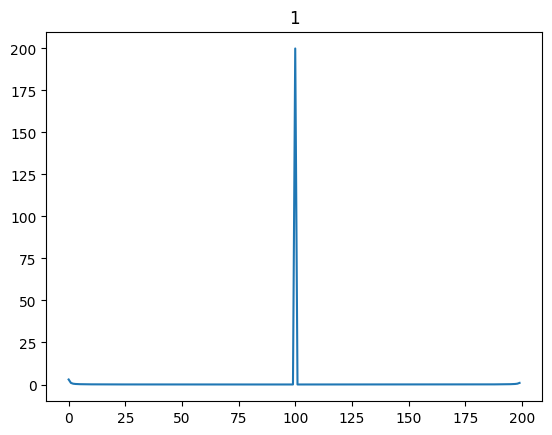

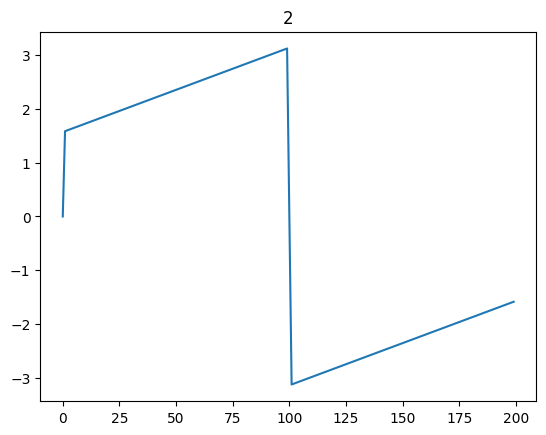

In [11]:
abs_y=np.abs(data_freqdom)
angle_y=np.angle(data_freqdom)
plt.figure()
plt.plot(time_data, abs_y)
plt.title('1')#雙邊振幅谱(為歸一化)
plt.figure()
plt.plot(time_data, angle_y)
plt.title('2')#雙邊相位譜(為歸一化)
plt.show()

In [7]:
n_harm_lower_limit = 0
n_harm_upper_limit = 50

In [8]:
all_harmonics = {}
for n_harm in range(n_harm_lower_limit, n_harm_upper_limit+1):
    mixed_harmonic = np.zeros(len(harmonics[0]))
    for j in range(n_harm):
        mixed_harmonic += harmonics[j]
    all_harmonics[n_harm] = mixed_harmonic

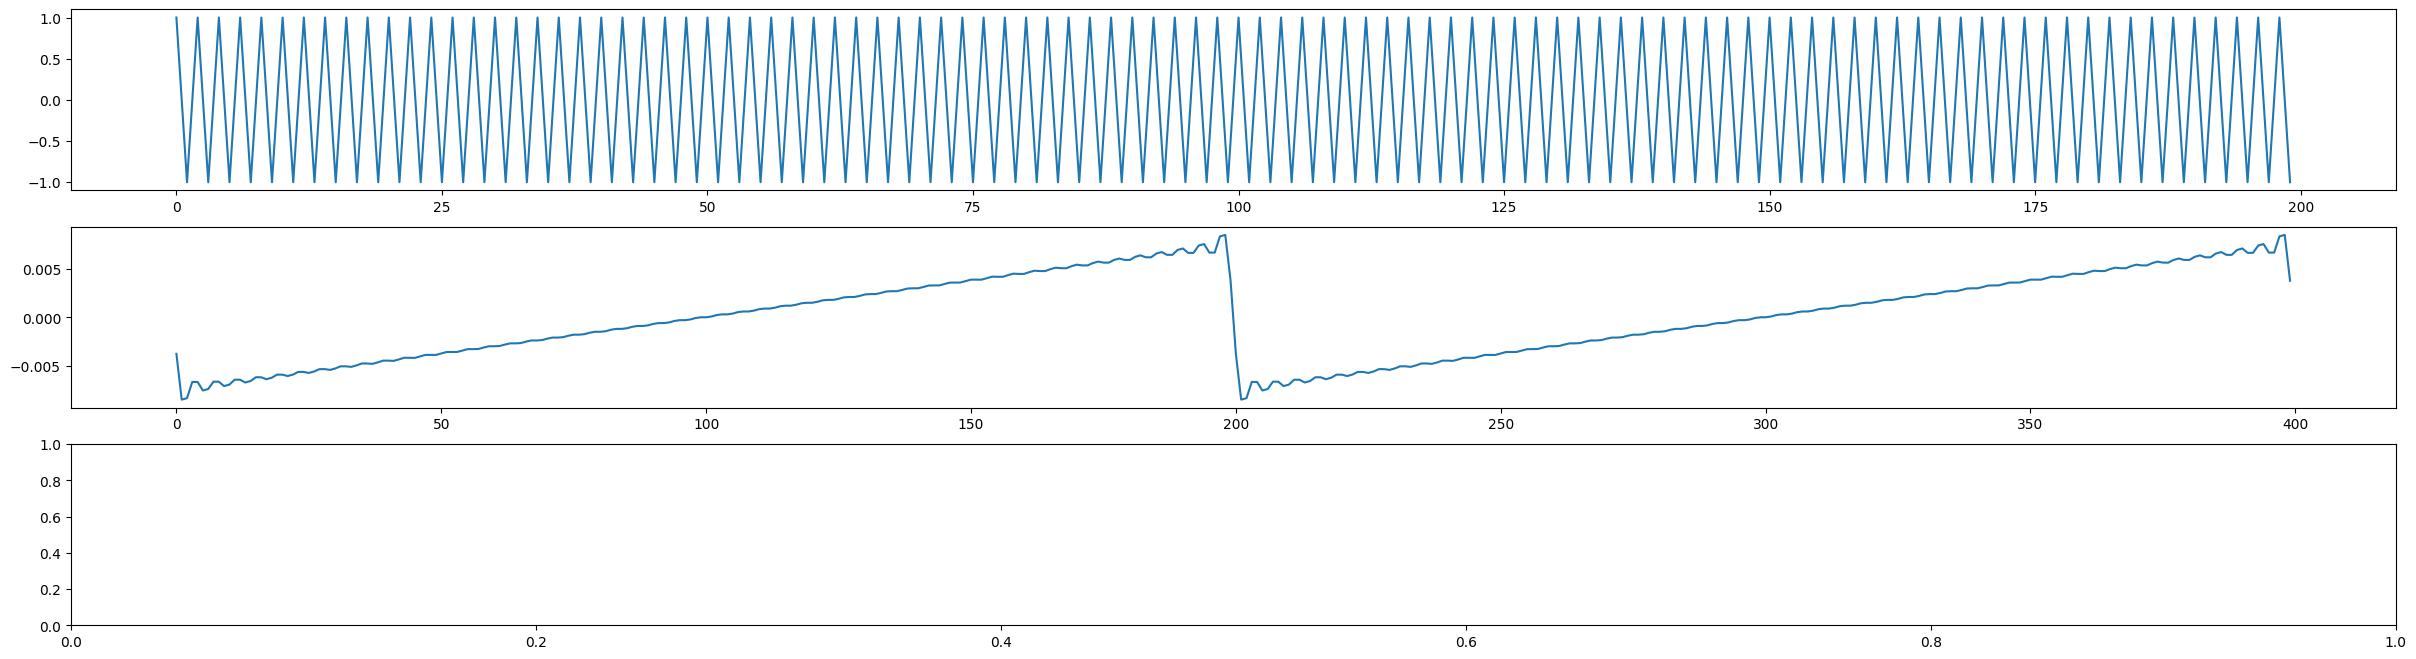

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(30, 8), sharex=False)
axes[0].plot(f)
# axes[0].set_xlim(-10, 200)
axes[1].plot(all_harmonics[50])
# axes[1].set_xlim(-10, 200)
# axes[2].plot(frequence, ampli)
# axes[2].set_xlim(0, 10)